# Derivative and Gradient Descent


This course introduces the gradient descent algorithm, a cornerstone of deep learning. To understand it better, let's review the concept of derivatives.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## Intuitive Understanding of the Derivative


Let's consider a function: $f(x) = 2x^2 - 3x + 4$


In [3]:
def f(x):
  return 2*x**2-3*x+4
f(3)

13

Let's plot this function using matplotlib.


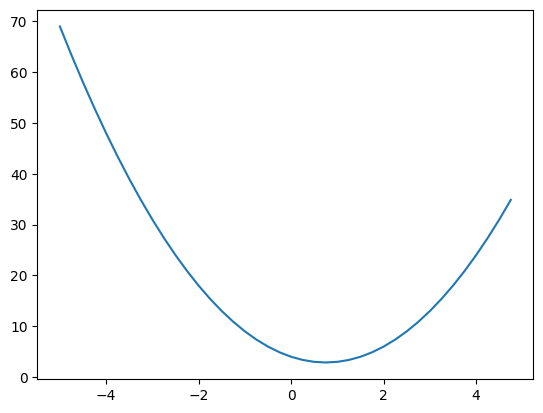

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

The derivative gives the slope of the tangent to the curve at a point.
To calculate it, we use the formula:
$f'(x) = \lim_{h \to 0} \frac{f(x+h)-h}{h}$
With a small $h$, we can numerically estimate the slope.

**Note**: The slope shows how $y$ changes when $x$ varies. If $x$ increases by 1 and $y$ by 2, the slope is 2.


In [4]:
h=0.0001
x=-1.0
print("Dérivée en x=-1 : ", (f(x+h)-f(x))/h)
x=2.0
print("Dérivée en x=2 : ", (f(x+h)-f(x))/h)

Dérivée en x=-1 :  -6.999800000002665
Dérivée en x=2 :  5.000200000004895


The graph shows that the slope is negative at $x=-1$ and positive at $x=2$.
The **sign** of the derivative indicates the direction of the slope, and its **value** shows its intensity.
Let's verify with [common derivatives](https://en.wikipedia.org/wiki/Table_of_derivatives):
For $f(x)=2x²-3x+4$, we have $f'(x)=4x-3$.
We find $f'(-1) \approx -7$ and $f'(2) \approx 5$.
The results are not exact because $h$ is not infinitely small.


In [5]:
# On définit deriv_f = f'(x)
def deriv_f(x):
  return 4*x-3

## Basics of Optimization by Gradient Descent


Optimization aims to minimize or maximize an objective function.
To find the minimum, two approaches are possible:
1. Solve $f'(x)=0$:
   $4x-3=0 \implies x=\frac{3}{4}$.
   This gives the minimum in this case, but not always in general.

2. Use **gradient descent**:
   Start from a point, for example $x=2$.
   Calculate $f'(2)=5$. The positive slope means that if $x$ increases, $f(x)$ also increases, and vice versa.
   To minimize $f(x)$, adjust $x$ with a factor $\alpha$ (learning rate).
   We get $x_{new}=x - slope \times \alpha=2-0.5=1.5$.
   Recalculate $f'(1.5)=3$, still positive, so we decrease $x$ further.
   Gradient descent adjusts $x$ in a loop until it reaches a minimum, considering the slope.


In [6]:
# Descente du gradient
x=2.0 # valeur aléatoire de x
alpha=0.01 # pas
iterations=250 # nombre d'itérations

for i in range(iterations):
  grad=deriv_f(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.7599999999999989


We obtain $x \approx \frac{3}{4}$. With a smaller step size ($\alpha$) and more iterations, we can refine the result.


## The Chain Rule


Before moving forward, let's recall a key mathematical rule for deep learning: the chain rule.
It allows us to train the parameters of the hidden layers of a network.
If $y$ depends on $u$, which depends on $x$, then:
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$


Let's take an example with dependent functions:
$u=2x²-x-2$
$y=3u+1$
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$ with $\frac{dy}{du}=3$ and $\frac{du}{dx}=2x-1$
$\frac{dy}{dx}=3(2x-1) = 6x-3$
Now, we know how $x$ affects $y$, and we can apply the gradient descent algorithm.


In [7]:
x=2.0
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad=deriv_y_x(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.49999999999999867


## Optimization of Multiple Variables


So far, we have looked for the minimum of a function with a single variable $x$.
An advantage of optimization methods is that we can optimize multiple variables at the same time with gradient descent. To do this, we need to calculate the derivative for each variable.


Let's take 3 variables $a$, $b$, and $c$ in the model:
$u=3a²-2a+b²+1$
$y=2u+c$
To apply gradient descent, let's calculate $\frac{dy}{da}$, $\frac{dy}{db}$, and $\frac{dy}{dc}$.
Using the chain rule:
- For $a$:
  $\frac{dy}{da} = \frac{dy}{du}\cdot\frac{du}{da} = 2(6a-2) = 12a-4$

- For $b$:
  $\frac{dy}{db} = \frac{dy}{du}\cdot\frac{du}{db} = 2(2b) = 4b$

- For $c$:
  $\frac{dy}{dc}=1$
Now, we can apply gradient descent.


In [8]:
def deriv_y_a(a):
  return 12*a-4
def deriv_y_b(b):
  return 4*b
def deriv_y_c(c):
  return 1

a=1.0
b=1.0
c=1.0
alpha=0.05
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad_a=deriv_y_a(a)
  grad_b=deriv_y_b(b)
  grad_c=deriv_y_c(b)
  if (grad_a>0):
    a=a-alpha
  else:
    a=a+alpha
  if (grad_b>0):
    b=b-alpha
  else:
    b=b+alpha
  if (grad_c>0):
    c=c-alpha
  else:
    c=c+alpha
print("approximate minimum found YAY, a = "+str(a)+" b = "+str(b)+" c = "+str(c))

approximate minimum found YAY, a = 0.29999999999999966 b = -3.191891195797325e-16 c = -11.50000000000003


We have found values that minimize $y$:
- $c$ tends towards negative infinity with many iterations.
- $b$ equals 0.
- $a$ equals 0.3.
